### Abkühlungsgeschichte eines Lavastroms
*Philpotts, Übung 5.12*

Ziel dieses Problems ist es, die Abkühlungsgeschichte des in Abbildung 4.6 gezeigten 15 m dicken isländischen basaltischen Lavastroms mit Hilfe der numerischen Methode von Shaw et al. (1977) zu berechnen und zu bestimmen, ob das thermische Maximum im Strom während der Abkühlung der Kolonnaden-Belag-Grenze entspricht. Das in Problem 5.9 erstellte Rechenblatt kann verwendet werden, aber in diesem Problem wird die latente Kristallisationswärme berücksichtigt. Folglich müssen die Formeln zur Berechnung der Temperatur If-Anweisungen enthalten, um zu bestimmen, ob Gleichung 5.26 oder 5.29 verwendet werden soll, um die Temperaturänderung während jedes Zeitschrittes zu berechnen. Verwenden Sie ein Tiefeninkrement von 2 m und ein Zeitintervall von 10 Tagen. Erweitern Sie die Tiefe auf 60m und die Zeit auf 600 Tage. Die Oberflächentemperatur der Lava und die Temperatur des Gesteins unter der Lava betragen zunächst 10°C. Stellen Sie die Temperatur an der Oberfläche der Lava und in einer Tiefe von 60m immer auf 10°C ein. Die Temperaturen in anderen Tiefen können sich ändern, wenn Wärme von der Oberfläche der Lava oder in das darunter liegende Gestein abgegeben wird. Die Lava wird mit ihrer Liquidus-Temperatur von 1200 °C eruptiert, und ihr Solidus beträgt 1000°C. Die latente Kristallisationswärme beträgt $400 kJ/kg$ , die linear zwischen dem Liquidus und dem Solidus freigesetzt wird. Die Wärmekapazität der Lava beträgt 1 $kJ/kg/K$. Die Temperaturleitfähigkeit der Lava und aller Gesteine beträgt $10 m/s$. Zeichnen Sie die Wärmeprofile bis zu einer Tiefe von 20m zu verschiedenen Zeitpunkten während der ersten 600 Tage. 

Zeichnen Sie eine Linie, die die Position des Temperaturmaximums auf jedem dieser Profile verfolgt. Wenn die Spitzen der Klüfte, die sich von der Oberfläche nach unten und von der Basis des Flusses nach oben ausbreiten, der 800 °C-Isotherme folgen, wo würden Sie erwarten, dass sich die Grenze zwischen Kolonnade und Gebirge befindet? Messen Sie die Position dieser Grenze in Abbildung 4.6 und kommentieren Sie die Übereinstimmung zwischen den Positionen der beobachteten und der berechneten Kolonnaden-Entablature-Grenze.

[Download Python Code](5-12Philpotts.py)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

k = 1E-6  # m2/s  Temperaturleitfähigkeit (nicht verwechseln mit Wärmeleitfähigkeit!!)

dt = 864000.  # seconds = 10 days
dz = 2.  # m
To = 1200.  # T Liquidus
Ts = 1000.  # T Solidus
C = 1.  # kJ/kg/K  spezifische Wärme
L = 400.  # kJ/kg  latente Wärme

In [2]:
tsteps = 60
maxt = dt*tsteps  # 600 Tage

deltaT = To - Ts
dsteps = 30  # 30 * 2m = 60m
zStart = dz/2
zEnd = zStart+(dsteps-1)*dz
depth = np.arange(zStart, zEnd, dz)
depth = np.insert(depth, 0, 0)
lavathickness = 15.

# Matrix mit den Temperaturen erstellen
T = np.empty([dsteps, tsteps])
# for testing T = np.empty([8, 12])

# alle Temperaturen werden zunächt auf Liquidustemp gesetzt
T.fill(To)
print(int(lavathickness/dz+1), )

# slicing the T array -> T an Oberfläche und in 60m Tiefe sollen 10°C sein
T[int(lavathickness/dz+1): ] = 10
# an der Oberfläche, erste Zeile der Matrix
T[0:1] = 10

# for testing slicing arrays T[1:4,2 :] = To
print(T)


8
[[  10.   10.   10. ...   10.   10.   10.]
 [1200. 1200. 1200. ... 1200. 1200. 1200.]
 [1200. 1200. 1200. ... 1200. 1200. 1200.]
 ...
 [  10.   10.   10. ...   10.   10.   10.]
 [  10.   10.   10. ...   10.   10.   10.]
 [  10.   10.   10. ...   10.   10.   10.]]


[[  10.   10.   10. ...   10.   10.   10.]
 [1200. 1200. 1200. ... 1200. 1200. 1200.]
 [1200. 1200. 1200. ... 1200. 1200. 1200.]
 ...
 [  10.   10.   10. ...   10.   10.   10.]
 [  10.   10.   10. ...   10.   10.   10.]
 [  10.   10.   10. ...   10.   10.   10.]] 2.0
[[  10.           10.           10.         ...   10.
    10.           10.        ]
 [ 942.96        796.96128     710.03652096 ...  190.92367043
   187.57129645  184.31399602]
 [1200.         1181.49312    1155.13932288 ...  356.32709094
   350.06249834  343.97472451]
 ...
 [  10.           10.           10.         ...   10.05066081
    10.05868797   10.06763239]
 [  10.           10.           10.         ...   10.01813048
    10.02124085   10.0247414 ]
 [  10.           10.           10.         ...   10.
    10.           10.        ]]
[  10.          654.97083765 1126.22595023 1195.62941522 1199.90406033
 1199.55583488 1184.60227584 1021.28111616  467.09526016  124.59460096
   21.99245824   10.           10.        

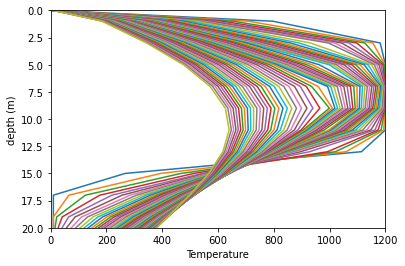

In [3]:
print(T, dz)
dT = k*dt/dz**2*(T[0][0]-2*T[1][0]+T[2][0])   # dT zwischen Zelle 0 und Zelle 1 nach einer Stunde
T[1][0] = T[1][0] + dT

# print(T[1][0])
# print(k*dt/dz**2*(25.-2*1094.25+1200.))   # change of T in one time increment
# print T

# Q[0] = -k*(T[0]-T[0])*A*dt/dz

for j in range(1, tsteps):
    #    print("j", j)
    for i in range(1, dsteps-1):
        if T[i][j-1] > Ts:
            fac = C*deltaT/(C*deltaT+L)
        else:
            fac = 1.
        dT = k*dt/dz**2 * (T[i+1][j-1]-2*T[i][j-1]+T[i-1][j-1])*fac
#       print T[i+1][j-1], T[i][j-1],T[i-1][j-1],dT,  T[i][j]

        T[i][j] = T[i][j-1] + dT
print(T)


# depth = np.linspace(0., dsteps*dz, dsteps)
print(T[:, 3], depth)

# interpolation
# s = interp1d(T[:,3], depth)
# xnew = np.linspace(25, 1200, num=20)
# ynew = s(xnew)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_xlim(0, To)
ax1.set_ylim(0, 20)
ax1.set_xlabel("Temperature")
ax1.set_ylabel("depth (m)")

for j in range(1, tsteps):
    ax1.plot(T[:, j], depth)

# ax1.plot(T[:, 3], depth, 'o',  xnew, ynew, '--' )

plt.gca().invert_yaxis()

plt.show()